In [78]:
import pandas as pd
import numpy as np
import snoop
from pprint import pprint as print
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time
from datetime import datetime
matplotlib.style.use("ggplot")
pd.set_option("display.width", 5000)
pd.set_option("display.max_columns", 60)
plt.rcParams["figure.figsize"] = (15, 10)

%load_ext snoop
%config InlineBackend.figure_format = 'retina'

# show all output not only the last result
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


The snoop extension is already loaded. To reload it, use:
  %reload_ext snoop


In [40]:
df = pd.read_csv("transactions by month.csv")


In [41]:
def foo(x):
    if "2018" in x:
        return "2018"
    elif "2019" in x:
        return "2019"
    else:
        return "other"


df["year"] = df["month"].apply(lambda x: foo(x))
df["margin"] = df["payment"] - df["primecost"]
df


,month,action,is_partner,servtype,users,services,items,payment,primecost,year,margin
0,2018-01,new,0,domain,6107,9811,9813,2273837,1852603,2018,421234
1,2018-01,new,1,domain,1118,6702,6702,1301999,1150975,2018,151024
2,2018-01,renew,0,domain,5879,7323,7324,6176681,1499403,2018,4677278
3,2018-01,renew,1,domain,3315,11978,11984,2852070,1881500,2018,970570
4,2018-02,new,0,domain,6468,10445,10445,2383773,1918312,2018,465461
...,...,...,...,...,...,...,...,...,...,...,...
280,2019-08,renew,1,hosting,326,468,471,254977,120554,2019,134423
281,2019-09,renew,1,hosting,338,451,453,268282,127668,2019,140614
282,2019-10,renew,1,hosting,368,482,483,292319,138769,2019,153550
283,2019-11,renew,1,hosting,328,461,464,255781,121364,2019,134417


In [ ]:
t = df.groupby("month").sum().sort_index()
t.drop("is_partner", axis=1)
t.rolling(3).mean()


Количество покупок и выручка по доменам

Text(0, 0.5, 'payment')

Text(0.5, 1.0, 'График  выручки')

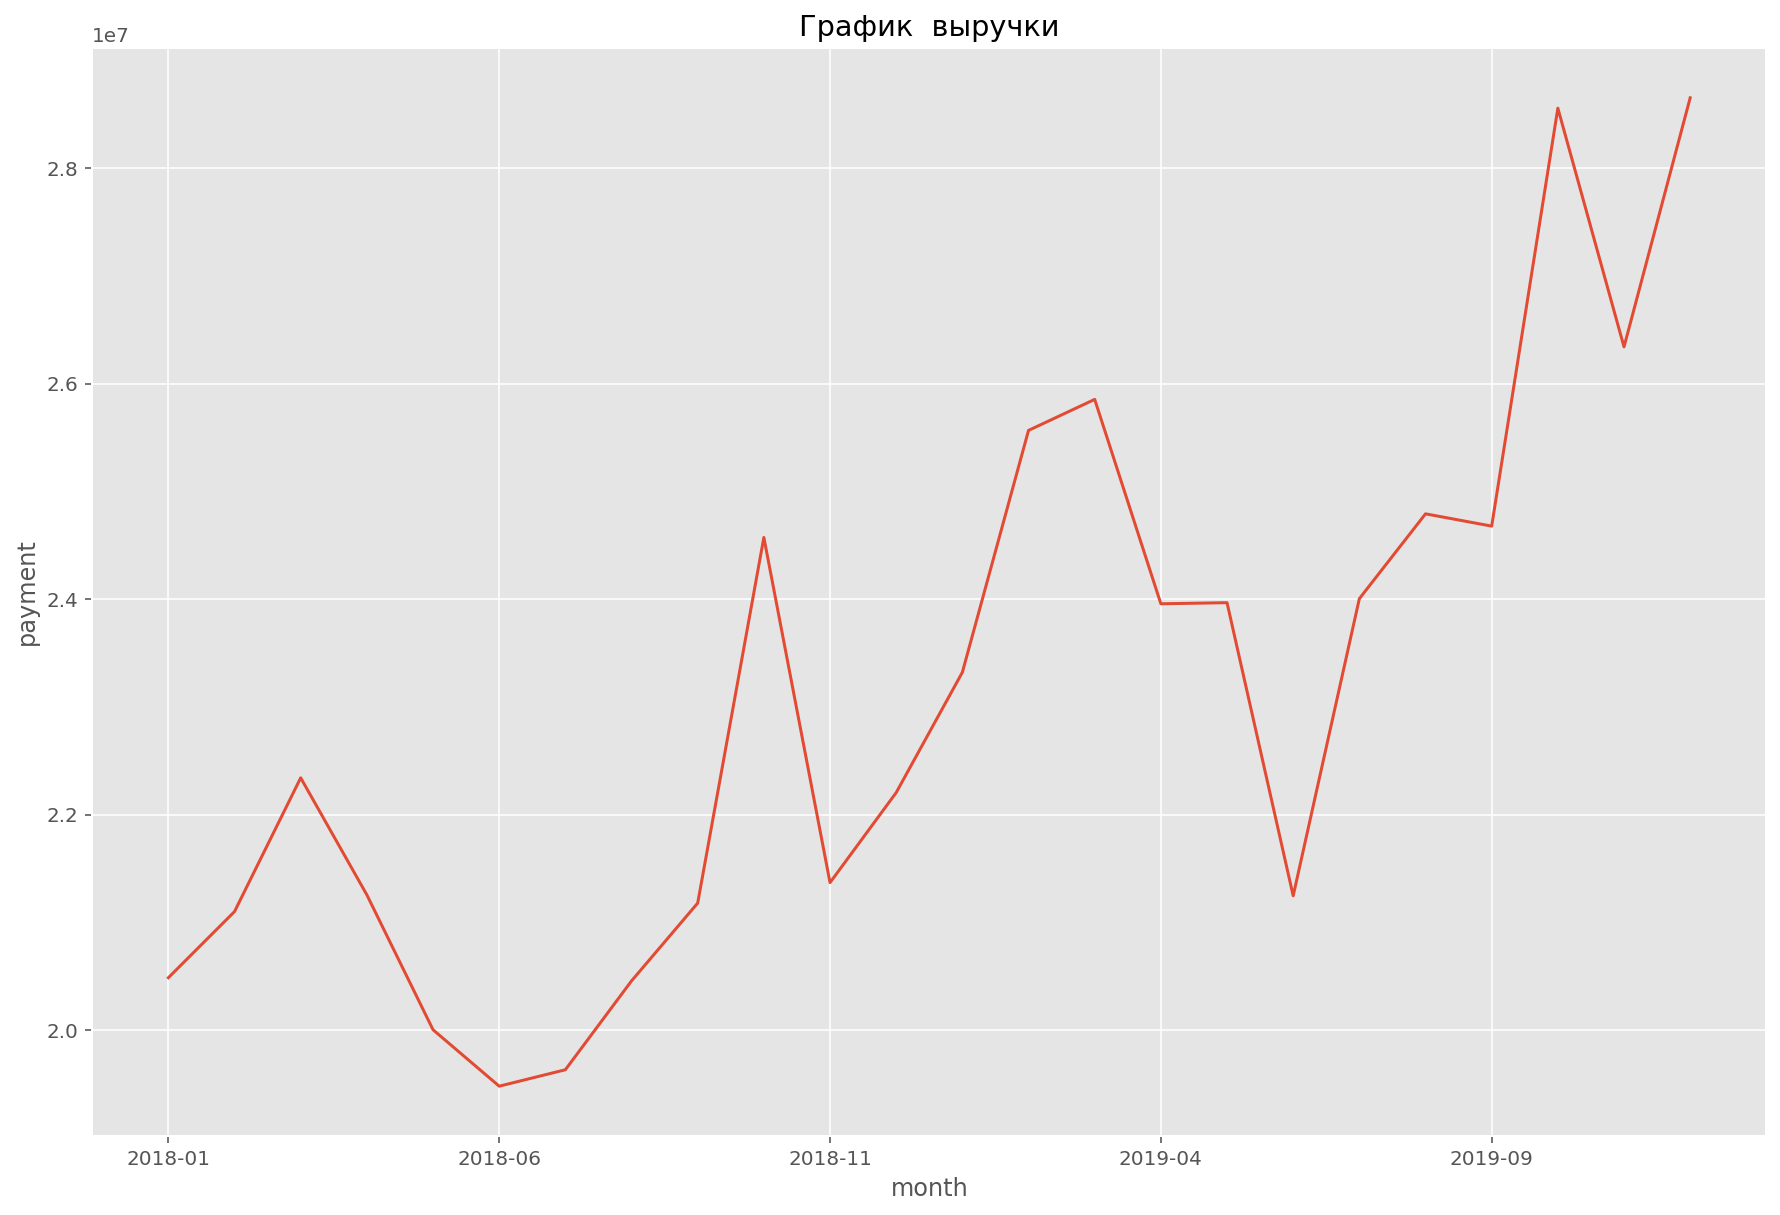

In [87]:
p = df.groupby(['month']).sum()['payment'].plot()
p.set_ylabel('payment')
plt.title('График  выручки')

Text(0, 0.5, 'items')

Text(0.5, 1.0, 'График динамики количества продаваемого товара')

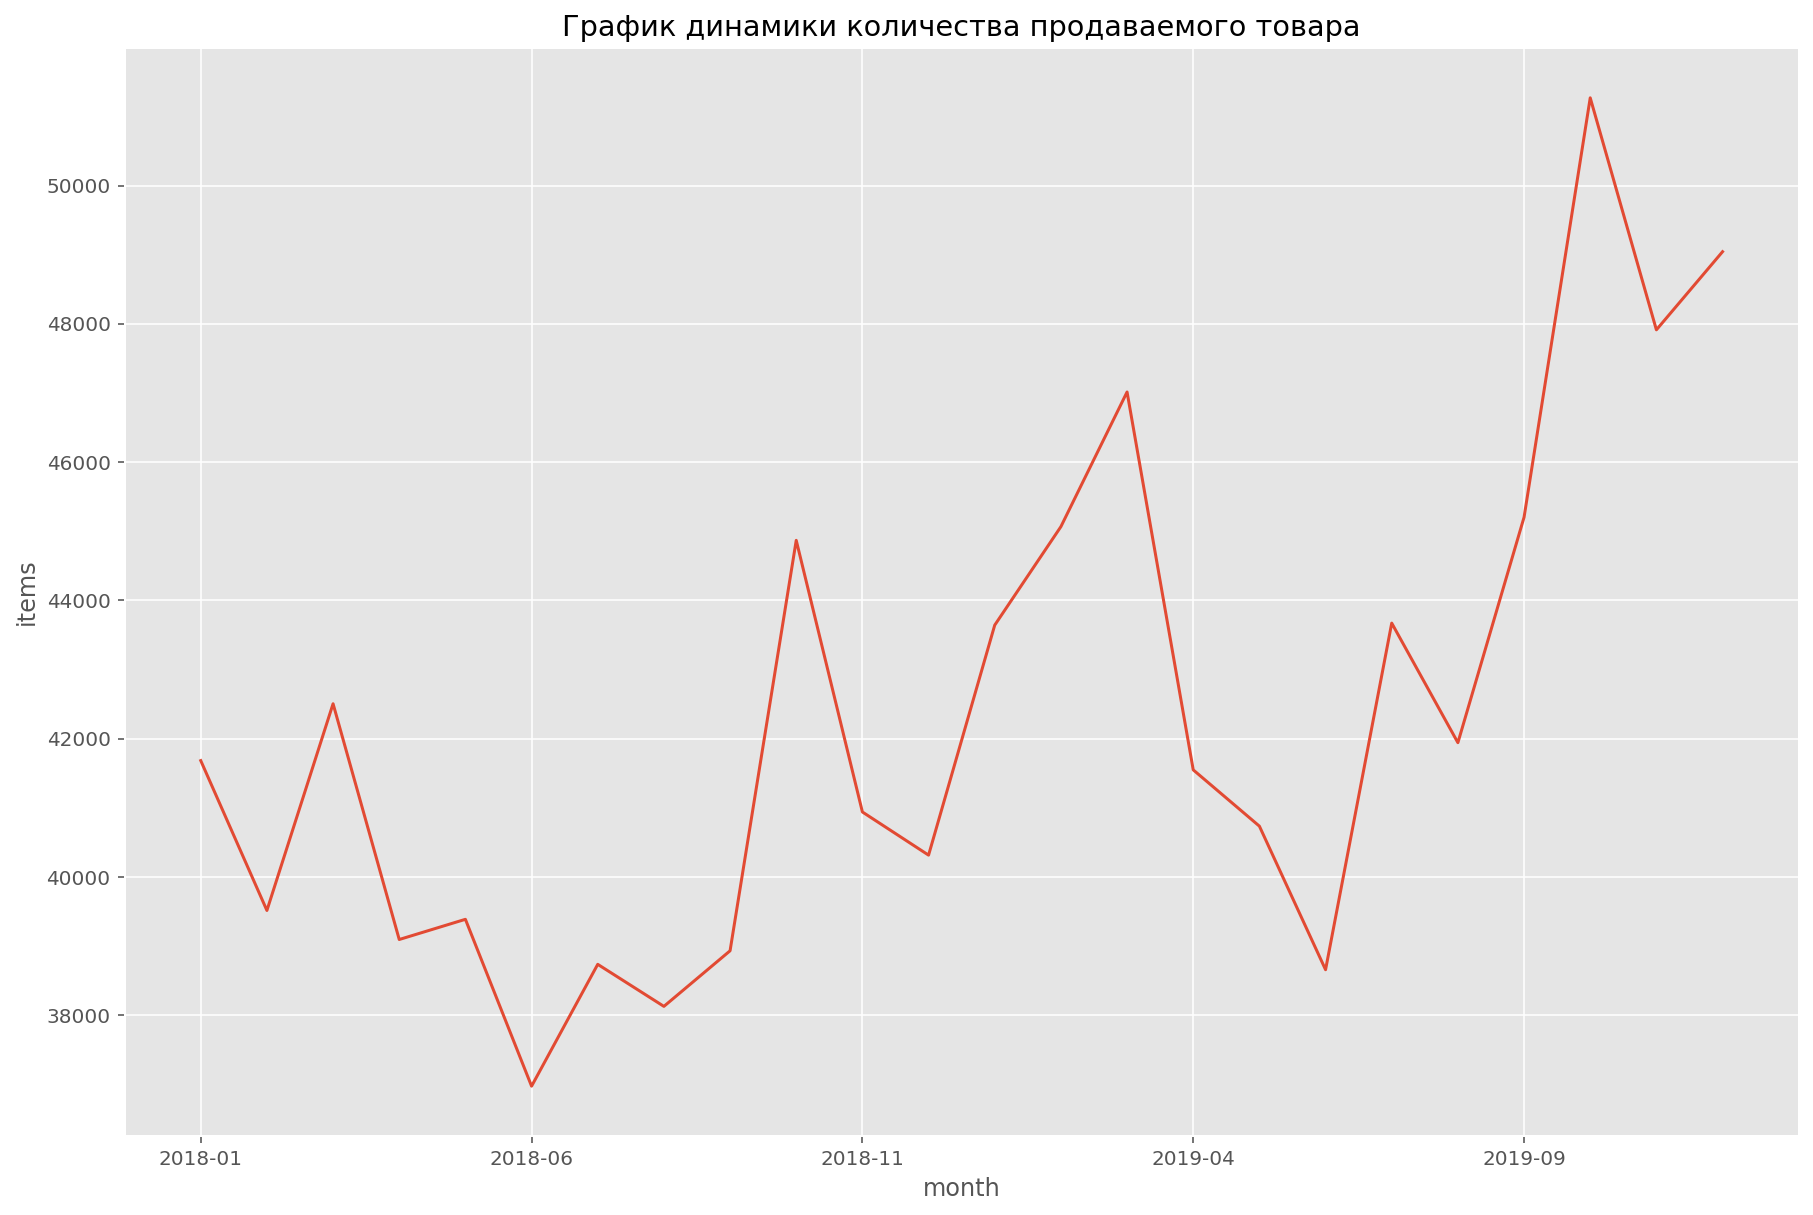

In [86]:
p = df.groupby(['month']).sum()['items'].plot()
p.set_ylabel('items')
plt.title('График динамики количества продаваемого товара')

In [6]:
t = df.groupby(["is_partner", "year", "servtype"]).sum()[
    ["services", "users", "items"]
]
t

services   users   items
is_partner year servtype                          
0          2018 domain      211661  144563  211715
                hosting      62284   59552   62613
                server        5172    3277    5258
           2019 domain      235026  165939  235123
                hosting      81726   78158   82156
                server        5114    3321    5175
1          2018 domain      195829   41118  195887
                hosting       5338    3963    5385
                server         240     218     240
           2019 domain      206795   39164  206845
                hosting       6090    4499    6129
                server         282     261     284

In [7]:
df = pd.read_csv("transactions by month.csv")

t = df.groupby("month").sum()[["payment", "items", "services", 'primecost']]
t2 = t.drop(["items", "services"], axis=1)
t2["items_services"] = t["items"] + t["services"]


In [56]:
t.index
t2

Index(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'], dtype='object', name='month')

,payment,primecost,items_services
month,,,
2018-01,20486710,8515340,83313
2018-02,21100713,8178356,78998
2018-03,22342275,8975880,84963
2018-04,21255857,8319081,78152
2018-05,20003753,8436539,78732
2018-06,19480021,7815237,73909
2018-07,19632478,8344969,77433
2018-08,20457270,8331682,76210
2018-09,21179560,8736494,77830


In [64]:
y = np.array(df.groupby('month').sum()['users'])
x = np.array(t.index)

In [79]:
@snoop
def make_time(x):
    parts = str(x).split('-')
    dt = datetime(year=int(parts[0]), month=int(parts[1]), day=1)
    return time.mktime(dt.timetuple())

for i in range(len(x)):
    x[i] = make_time(x[i])

In [81]:
len(x)

24

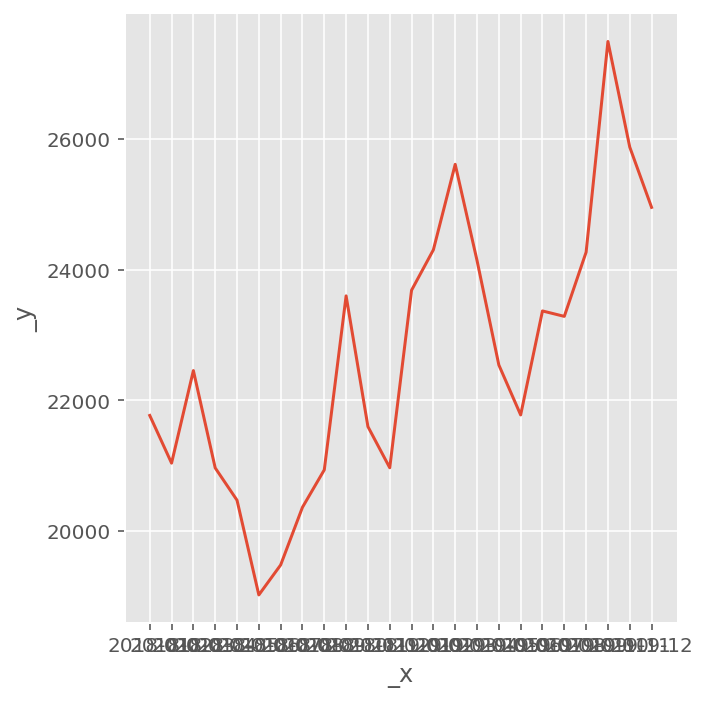

In [67]:
sns.relplot(x=x, y=y
 , kind='line')

In [68]:
from sklearn.linear_model import LinearRegression


x_train, y_train = x, y


In [82]:
%%snoop

LinReg = LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1, 1))
LinReg.coef_

13:50:22.86 >>> Call to <module> in File "/var/folders/t0/fw3jvl196_v78v94hzhxhpgw0000gn/T/ipykernel_1053/3853386306.py", line 2
13:50:22.86 ...... y = array([21771, 21041, 22458, ..., 27497, 25880, 24957])
13:50:22.86 ...... y.shape = (24,)
13:50:22.86 ...... y.dtype = dtype('int64')
13:50:22.86 ...... x = array([1514754000.0, 1517432400.0, 1519851600.0, ..., 1569877200.0,
13:50:22.86                   1572555600.0, 1575147600.0], dtype=object)
13:50:22.86 ...... x.shape = (24,)
13:50:22.86 ...... x.dtype = dtype('O')
13:50:22.86 ...... LinearRegression = <class 'sklearn.linear_model._base.LinearRegression'>
13:50:22.86    2 | LinReg = LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1, 1))
13:50:22.87    2 | LinReg = LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1, 1))
13:50:22.89 ...... LinReg = LinearRegression()
13:50:22.89    3 | LinReg.coef_
13:50:22.89 <<< Return value from <module>: None


In [78]:
np.array(forecast).flatten()

array([76606.66333333, 77308.86289855, 78011.06246377, 78713.26202899,
       79415.4615942 , 80117.66115942, 80819.86072464, 81522.06028986,
       82224.25985507, 82926.45942029, 83628.65898551, 84330.85855072])

In [91]:
pd.to_datetime(sorted(x)[-1])

Timestamp('1970-01-01 00:26:15.147600')

In [84]:
def prediction(month):
    return LinReg.predict(np.array(month).reshape(-1, 1))

array([[25239.68042638]])

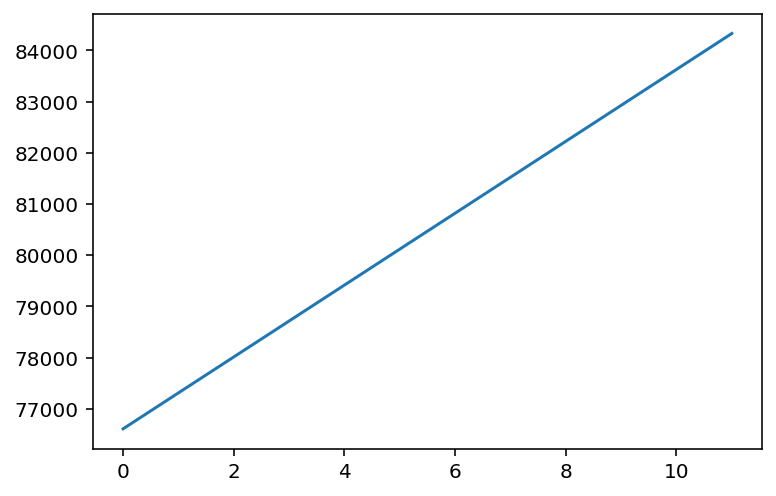

In [79]:
import matplotlib.pyplot as plt
pred = lambda i: LinReg.predict(np.array(i).reshape(-1, 1))
forecast = np.array([pred(i) for i in range(12)]).flatten()
plt.plot([i for i  in range(12)], forecast)